In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_parquet('../data/raw/restaurante.parquet')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (30000, 17)


,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2586712032,Aaron,Terry,42.0,Masculino,NYC,Bajo,1,19.41,Sí,No,Vegetariano,No,8914894420,None,Efectivo,807
1,8083396378,Aaron,Edwards,23.0,Masculino,Dallas,Bajo,0,0.00,Sí,Sí,Carnes,No,001-821-337-4847x28301,None,Tarjeta,878
2,1492119727,Aaron,Mason,24.0,Masculino,Houston,Bajo,1,8.56,No,Sí,Mariscos,No,489-471-9165,jason75@example.net,Tarjeta,924
3,9988027682,Aaron,Kennedy,24.0,Masculino,Boston,Bajo,2,7.65,No,Sí,Pescado,No,None,gonzalezryan@example.net,Efectivo,928
4,6902077458,Aaron,Gomez,26.0,Masculino,Denver,Bajo,3,11.72,No,Sí,Carnes,No,383.356.2737,None,Tarjeta,946


## EDA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  Int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  Int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

- Se evidencian bastantes nulos en telefono_contacto, correo_electronico

In [11]:
df.describe()

,id_persona,edad,frecuencia_visita,promedio_gasto_comida,ingresos_mensuales
count,30000.0,29899.000000,30000.0,29855.000000,30000.0
mean,5504764563.8191,49.665006,3.896133,32.603452,5389.755867
std,2602799263.541167,23.839550,2.741532,26.402601,4538.491728
min,1000153386.0,-5.000000,-3.0,0.000000,800.0
25%,3243617026.0,33.000000,2.0,13.290000,1860.0
50%,5515865060.0,49.000000,4.0,25.510000,3402.0
75%,7754425564.0,65.000000,5.0,44.400000,7761.0
max,9999627377.0,300.000000,10.0,149.970000,17999.0


- Aca un principal hallazgo es que hay una persona con edad de -5 y otro con edad de 300
- La frecuencia de visita hay un valor en -3


In [12]:
df["genero"].value_counts()

genero
Femenino     15044
Masculino    14956
Name: count, dtype: int64

In [14]:
df["ciudad_residencia"].value_counts()

ciudad_residencia
Chicago      5384
NYC          4769
Miami        3186
San Diego    3075
Dallas       2602
Boston       2547
Denver       2523
Houston      2212
Seattle      2191
Phoenix      1511
Name: count, dtype: int64

In [15]:
df["estrato_socioeconomico"].value_counts()

estrato_socioeconomico
Medio       9325
Alto        9038
Bajo        6161
Muy Alto    5476
Name: count, dtype: int64

In [16]:
df["ocio"].value_counts()

ocio
No    15094
Sí    14906
Name: count, dtype: int64

In [17]:
df["consume_licor"].value_counts()

consume_licor
Sí    18483
No    11517
Name: count, dtype: int64

preferencias_alimenticias
Carnes         7916
Vegetariano    6580
Mariscos       5212
Vegano         3267
Pescado        2983
Otro           2639
Name: count, dtype: int64

- Toca revisar la variable objetivo

In [20]:

df["membresia_premium"].value_counts()

membresia_premium
No    17155
Sí    12845
Name: count, dtype: int64

#### Diccionario de datos

**id_persona**
- Tipo: Numérica Discreta
- Descripción: Identificador único de persona
- Valores Faltantes: 0

**edad**
- Tipo: Numérica Continua
- Descripción: Edad del cliente en años
- Valores Faltantes: 101 (0.34%)

**frecuencia_visita**
- Tipo: Numérica Discreta
- Descripción: Número de visitas al restaurante
- Valores Faltantes: 0

**promedio_gasto_comida**
- Tipo: Numérica Continua
- Descripción: Gasto promedio por visita en pesos
- Valores Faltantes: 145 (0.48%)

**ingresos_mensuales**
- Tipo: Numérica Discreta
- Descripción: Ingresos mensuales del cliente en pesos
- Valores Faltantes: 0

#### Variables Categóricas Nominales

**nombre**
- Tipo: Nominal Politómica
- Descripción: Nombre del cliente
- Valores Faltantes: 0

**apellido**
- Tipo: Nominal Politómica
- Descripción: Apellido del cliente
- Valores Faltantes: 0

**genero**
- Tipo: Nominal Dicotómica
- Descripción: Género del cliente
- Valores Faltantes: 0

**ciudad_residencia**
- Tipo: Nominal Politómica
- Descripción: Ciudad donde reside el cliente
- Valores Faltantes: 0

**ocio**
- Tipo: Nominal Politómica
- Descripción: Actividades de ocio preferidas
- Valores Faltantes: 0

**consume_licor**
- Tipo: Nominal Dicotómica
- Descripción: Indica si consume alcohol (Sí/No)
- Valores Faltantes: 0

**preferencias_alimenticias**
- Tipo: Nominal Politómica
- Descripción: Tipo de comida preferida
- Valores Faltantes: 1403 (4.68%)

**membresia_premium**
- Tipo: Nominal Dicotómica
- Descripción: Indica si tiene membresía premium (Sí/No)
- Valores Faltantes: 0

**tipo_de_pago_mas_usado**
- Tipo: Nominal Politómica
- Descripción: Método de pago preferido
- Valores Faltantes: 0

#### Variables Categóricas Ordinales

**estrato_socioeconomico**
- Tipo: Ordinal Politómica
- Descripción: Nivel socioeconómico (1 a 6)
- Valores Faltantes: 0

In [ ]:
# Unificacion de representacion de nulos
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

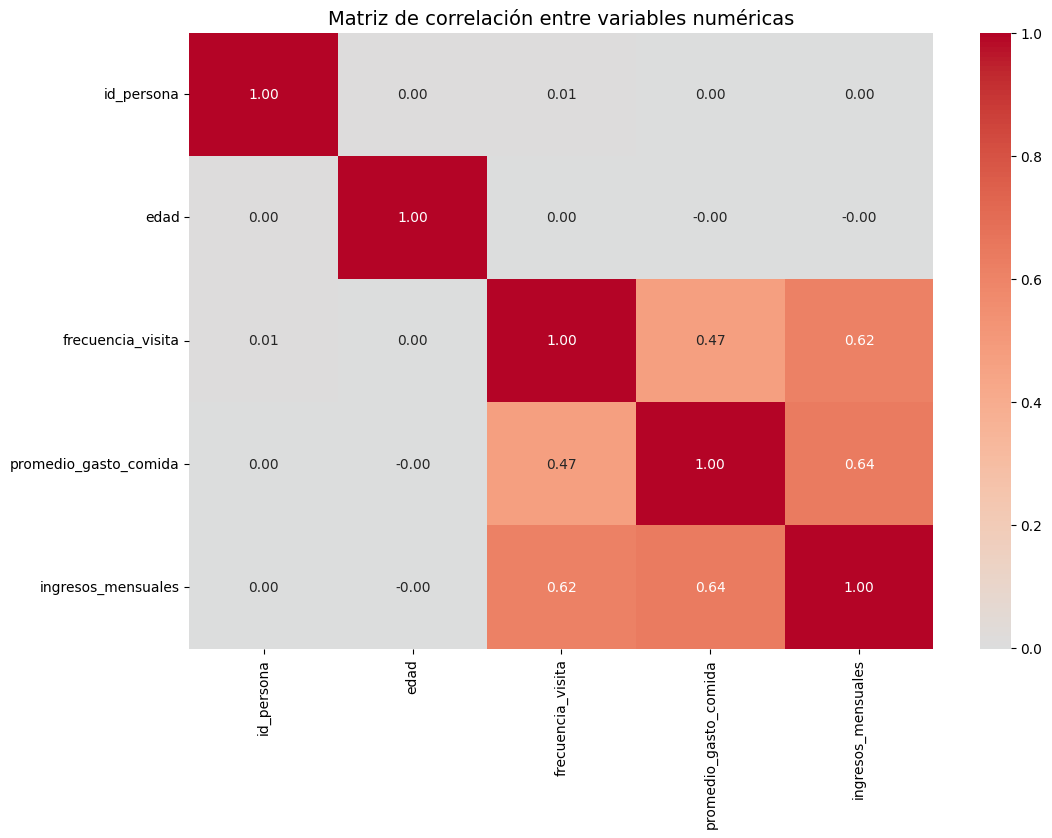

In [23]:
#Matriz de correlacion para ver si hay variables redundantes


import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, cbar=True)
plt.title("Matriz de correlación entre variables numéricas", fontsize=14)
plt.show()